## Segmentation Data - Legend

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical 'FMCG' store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed, and there are no missing values. In addition, the volume of the dataset has been restricted and anonymized to protect the privacy of the customers.

### Variable Descriptions

| Variable        | Data type   | Range        | Description                                                                                     |
|-----------------|-------------|--------------|-------------------------------------------------------------------------------------------------|
| ID              | numerical   | Integer      | Shows a unique identifier of a customer.                                                        |
| Sex             | categorical | {0, 1}       | Biological sex (gender) of a customer. In this dataset, there are only 2 different options.   |
|                 |             |              | 0: Male                                                                                        |
|                 |             |              | 1: Female                                                                                      |
| Marital status  | categorical | {0, 1}       | Marital status of a customer.                                                                  |
|                 |             |              | 0: Single                                                                                      |
|                 |             |              | 1: Non-single (divorced / separated / married / widowed)                                      |
| Age             | numerical   | Integer      | The age of the customer in years, calculated as current year minus the year of birth.         |
|                 |             |              | Min value: 18 (the lowest age observed in the dataset)                                        |
|                 |             |              | Max value: 76 (the highest age observed in the dataset)                                       |
| Education       | categorical | {0, 1, 2, 3} | Level of education of the customer.                                                            |
|                 |             |              | 0: Other / Unknown                                                                             |
|                 |             |              | 1: High School                                                                                 |
|                 |             |              | 2: University                                                                                  |
|                 |             |              | 3: Graduate School                                                                             |
| Income          | numerical   | Real         | Self-reported annual income in US dollars of the customer.                                    |
|                 |             |              | Min value: 35,832 (the lowest income observed in the dataset)                                 |
|                 |             |              | Max value: 309,364 (the highest income observed in the dataset)                               |
| Occupation      | categorical | {0, 1, 2}   | Category of occupation of the customer.                                                        |
|                 |             |              | 0: Unemployed / Unskilled                                                                      |
|                 |             |              | 1: Skilled Employee / Official                                                                 |
|                 |             |              | 2: Management / Self-employed / Highly Qualified Employee / Officer                           |
| Settlement size | categorical | {0, 1, 2}   | The size of the city that the customer lives in.                                              |
|                 |             |              | 0: Small City                                                                                  |
|                 |             |              | 1: Mid-sized City                                                                              |
|                 |             |              | 2: Big City                                                                                    |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

import warnings 
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


In [2]:
df_ = pd.read_csv('../data/raw/Segmentation data.csv', index_col=[0])
df = df_.copy()

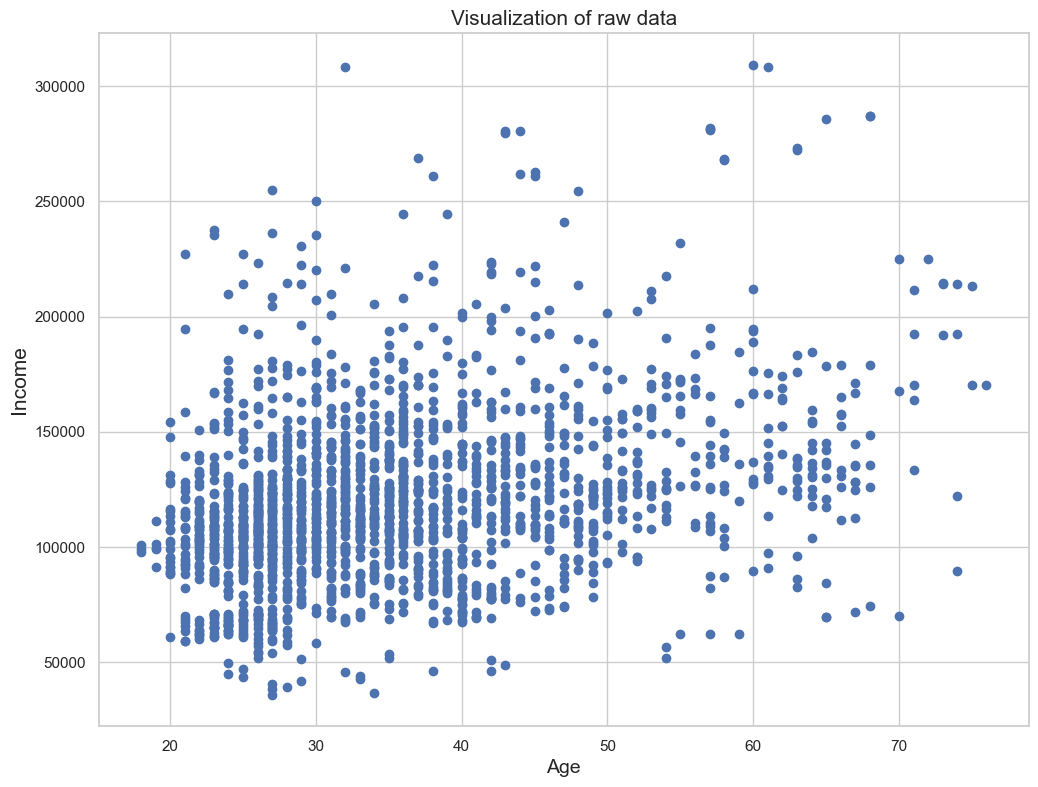

In [4]:
plt.figure(figsize = (12, 9))
plt.scatter(x = df.loc[:, 'Age'], y = df.loc[:, 'Income'])
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Income', fontsize = 15)
plt.title('Visualization of raw data', fontsize = 15)
plt.savefig('../reports/figures/raw_data.png')
plt.show()

In [5]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [6]:
hier_clust = linkage(df_std, method = 'ward')

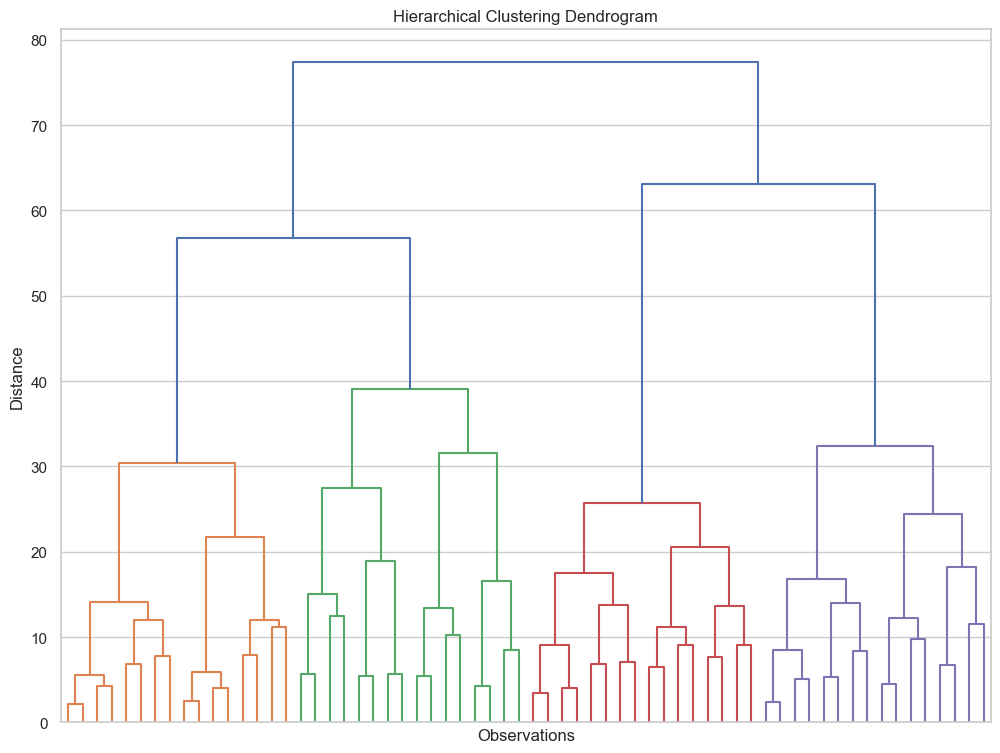

In [7]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.savefig('../reports/figures/Hierachical_clustering.png')
plt.show()

## ${\textbf{K-means Clustering}}$

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

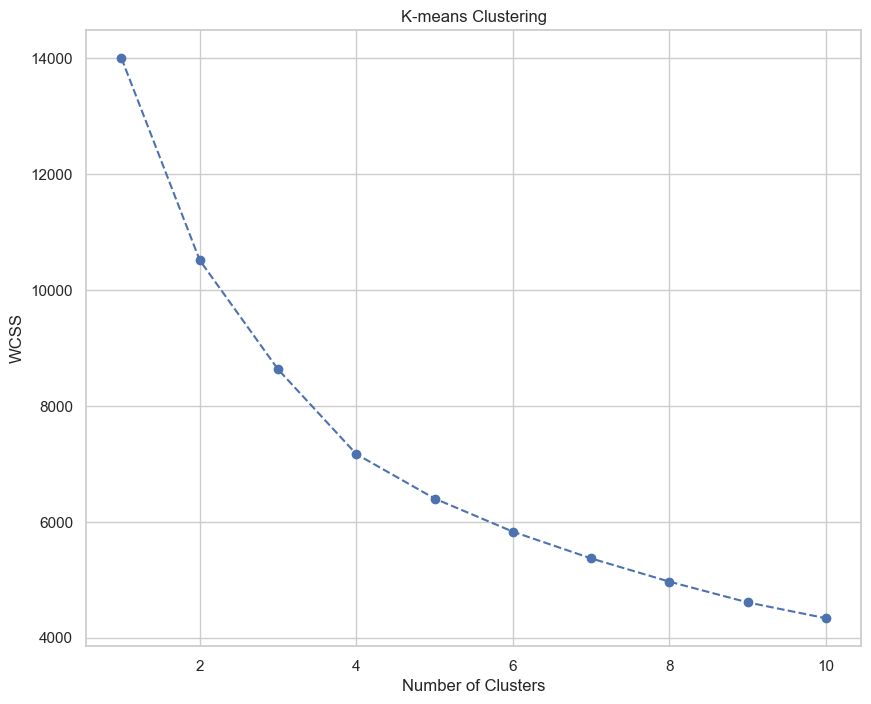

In [9]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.savefig('../reports/figures/wcss.png')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5, random_state = 42)

In [11]:
kmeans.fit(df_std)

KMeans(n_clusters=5, random_state=42)

In [12]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,4
100000002,1,1,22,1,150773,1,2,0
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [15]:
df_segm_kmeans.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000,1.881000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533,1.290221
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000,3.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000,4.000000


In [13]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.660167,0.983287,28.172702,1.013928,127151.857939,1.130919,1.309192
1,0.834034,1.000000,30.733193,1.123950,97098.056723,0.399160,0.004202
2,0.362031,0.000000,35.527594,0.743929,98133.229581,0.335541,0.041943
3,0.004274,0.000000,36.927350,0.675214,141806.596154,1.252137,1.512821
4,0.467213,0.672131,56.143443,2.147541,160749.204918,1.176230,1.143443


### Cluster Analysis based on K-means Clustering

The K-means clustering algorithm has grouped customers into five distinct segments based on their demographic and income-related features. Below are the characteristics of each segment:

#### Cluster 0: "Young Professionals"

- Sex: Predominantly male (66% male, 34% female)
- Marital Status: Mostly married or in a committed relationship (98% non-single)
- Age: Relatively young (average age around 28 years)
- Education: Predominantly have completed high school or equivalent (average education level 1.01)
- Income: Moderate income level (average income around $127,152)
- Occupation: Primarily skilled employees or officials (average occupation category 1.13)
- Settlement Size: Mostly from mid-sized to big cities (average settlement size category 1.31)

#### Cluster 1: "Young Earners"

- Sex: Predominantly female (83% female, 17% male)
- Marital Status: Mostly married or in a committed relationship (100% non-single)
- Age: Young adults (average age around 31 years)
- Education: Predominantly have completed university or higher education (average education level 1.12)
- Income: Moderate income level (average income around $97,098)
- Occupation: Mainly unemployed or unskilled workers (average occupation category 0.40)
- Settlement Size: Mostly from small cities (average settlement size category 0.00)

#### Cluster 2: "Early Career Settlers"

- Sex: Predominantly male (36% male, 64% female)
- Marital Status: Majority are single (100% single)
- Age: In their early 30s (average age around 36 years)
- Education: Primarily have completed high school or equivalent (average education level 0.74)
- Income: Moderate income level (average income around $98,133)
- Occupation: Mostly unemployed or unskilled workers (average occupation category 0.34)
- Settlement Size: Predominantly from small cities (average settlement size category 0.04)

#### Cluster 3: "Well-Educated High Earners"

- Sex: Predominantly male (0.4% male, 99.6% female)
- Marital Status: Majority are single (100% single)
- Age: In their late 30s (average age around 37 years)
- Education: Mostly have completed high school or equivalent (average education level 0.68)
- Income: High income level (average income around $141,807)
- Occupation: Mostly skilled employees or officials (average occupation category 1.25)
- Settlement Size: Mostly from mid-sized to big cities (average settlement size category 1.51)

#### Cluster 4: "Experienced Professionals"

- Sex: Almost equally distributed between male and female (47% male, 53% female)
- Marital Status: Mostly married or in a committed relationship (67% non-single)
- Age: Mature adults (average age around 56 years)
- Education: Highly educated, with most having completed university or higher education (average education level 2.15)
- Income: High income level (average income around $160,749)
- Occupation: Mainly skilled employees, officials, or in management roles (average occupation category 1.18)
- Settlement Size: Mostly from mid-sized to big cities (average settlement size category 1.14)

Based on the characteristics of each cluster, we can name them as follows: "Young Professionals," "Young Earners," "Early Career Settlers," "Well-Educated High Earners," and "Experienced Professionals." These names are descriptive of the dominant traits exhibited by customers within each cluster.


In [37]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [38]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.660167,0.983287,28.172702,1.013928,127151.857939,1.130919,1.309192,359,0.1795
1,0.834034,1.000000,30.733193,1.123950,97098.056723,0.399160,0.004202,476,0.2380
2,0.362031,0.000000,35.527594,0.743929,98133.229581,0.335541,0.041943,453,0.2265
3,0.004274,0.000000,36.927350,0.675214,141806.596154,1.252137,1.512821,468,0.2340
4,0.467213,0.672131,56.143443,2.147541,160749.204918,1.176230,1.143443,244,0.1220


In [54]:
df_segm_analysis.rename({4:'well-off',
                         2:'fewer-opportunities',
                         1:'standard',
                         3:'career focused',
                         0: 'unknown'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
unknown,0.660167,0.983287,28.172702,1.013928,127151.857939,1.130919,1.309192,359,0.1795
standard,0.834034,1.000000,30.733193,1.123950,97098.056723,0.399160,0.004202,476,0.2380
fewer-opportunities,0.362031,0.000000,35.527594,0.743929,98133.229581,0.335541,0.041943,453,0.2265
career focused,0.004274,0.000000,36.927350,0.675214,141806.596154,1.252137,1.512821,468,0.2340
well-off,0.467213,0.672131,56.143443,2.147541,160749.204918,1.176230,1.143443,244,0.1220


In [57]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused', 
                                                                  4:'unknown'})

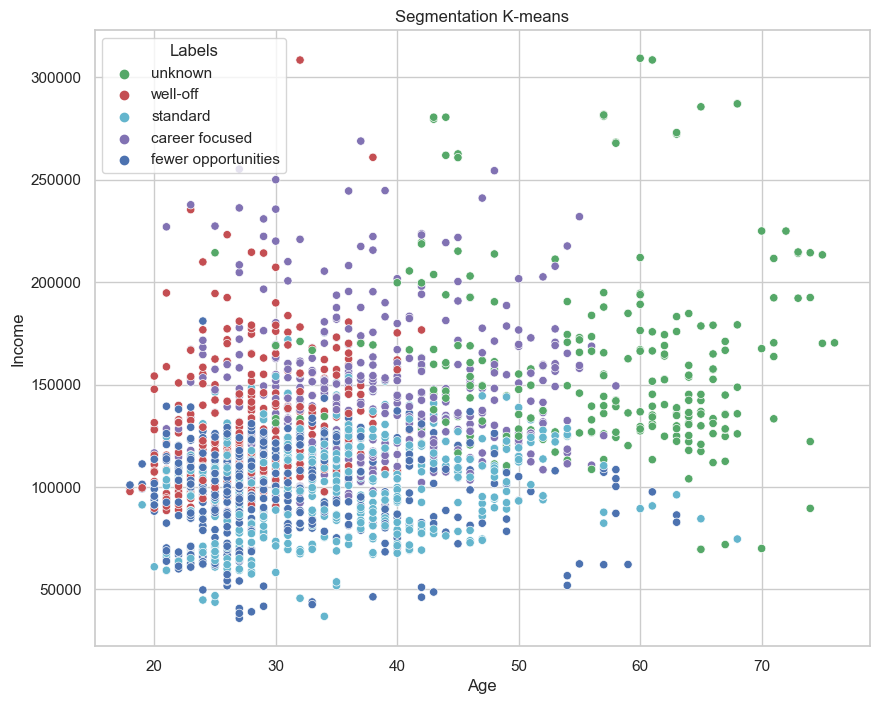

In [64]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis,y =  y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm','b'])
plt.title('Segmentation K-means')
plt.show()

### ${\textbf{PCA}}$

In [65]:
pca = PCA()

In [66]:
pca.fit(df_std)

PCA()

In [67]:
pca.explained_variance_ratio_.cumsum()

array([0.35696328, 0.61947251, 0.80768365, 0.88326115, 0.94042627,
       0.97997421, 1.        ])

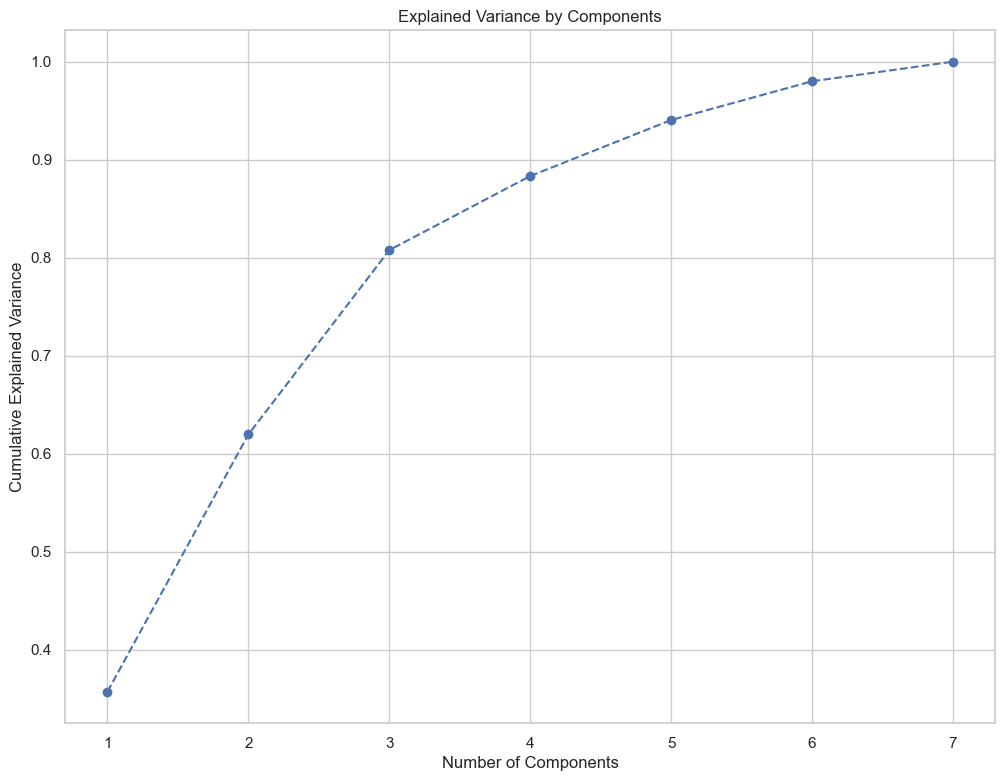

In [70]:
plt.figure(figsize = (12,9))
plt.plot(list(range(1,8)), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [71]:
pca = PCA(n_components = 3)

In [72]:
pca.fit(df_std)

PCA(n_components=3)

### ${\textbf{PCA Results}}$

In [73]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [74]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


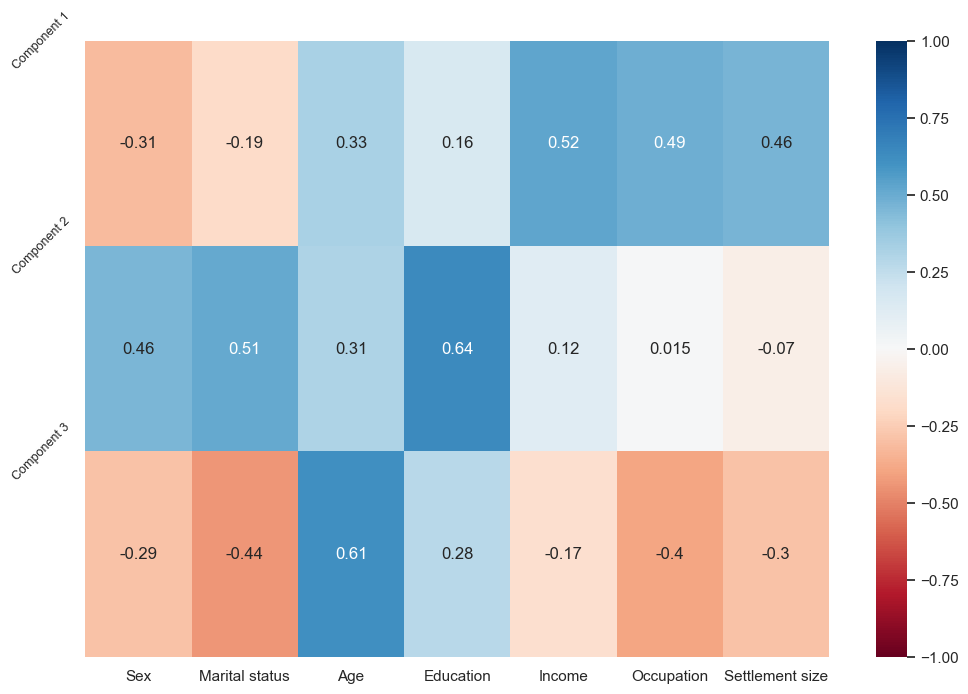

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)
plt.show()

In [76]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [77]:
scores_pca = pca.transform(df_std)

### ${\textbf{K-means clustering with PCA}}$

In [78]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

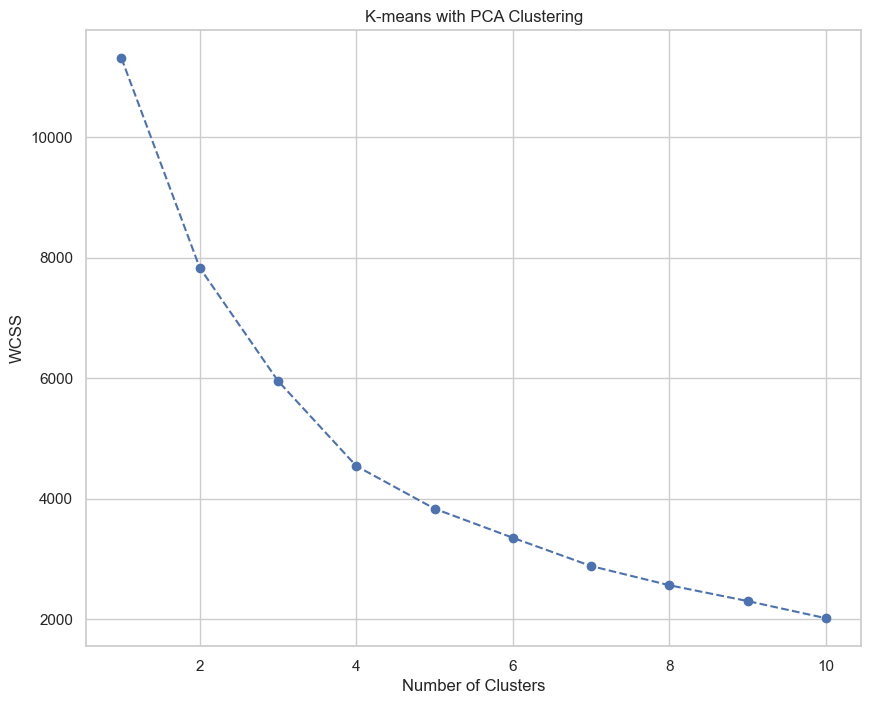

In [79]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [80]:
kmeans_pca = KMeans(n_clusters = 5, random_state = 42)

In [81]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [82]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [83]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,4
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,4
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,3
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [84]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.478088,0.677291,55.764940,2.135458,160996.087649,1.175299,1.147410,1.823165,2.009250,0.816435
1,0.096386,0.000000,34.506024,0.560241,97094.189759,0.346386,0.117470,-0.787654,-1.423233,0.975932
2,0.879487,0.730769,33.787179,1.179487,88644.882051,0.053846,0.000000,-1.829596,0.663303,0.377274
3,0.779439,0.938318,27.915888,1.003738,119174.517757,1.039252,0.768224,-0.436002,0.496823,-1.156412
4,0.004065,0.073171,37.099593,0.725610,144174.142276,1.288618,1.504065,1.525794,-1.130684,-0.116649


In [85]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.478088,0.677291,55.764940,2.135458,160996.087649,1.175299,1.147410,1.823165,2.009250,0.816435,251,0.1255
career focused,0.096386,0.000000,34.506024,0.560241,97094.189759,0.346386,0.117470,-0.787654,-1.423233,0.975932,332,0.1660
fewer opportunities,0.879487,0.730769,33.787179,1.179487,88644.882051,0.053846,0.000000,-1.829596,0.663303,0.377274,390,0.1950
well-off,0.779439,0.938318,27.915888,1.003738,119174.517757,1.039252,0.768224,-0.436002,0.496823,-1.156412,535,0.2675
4,0.004065,0.073171,37.099593,0.725610,144174.142276,1.288618,1.504065,1.525794,-1.130684,-0.116649,492,0.2460


In [86]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

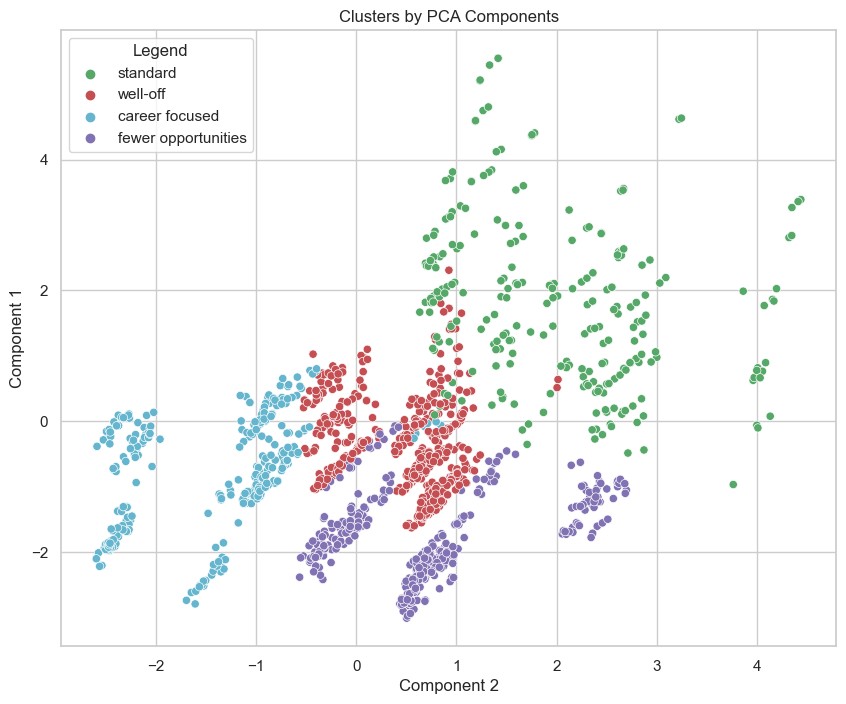

In [87]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis,y =  y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [88]:
# pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [89]:
# pickle.dump(pca, open('pca.pickle', 'wb'))

In [90]:
# pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))